## Final Project ( Introduction to Machine Learning )
### Danial Mirza , youth.mirza@gmail.com

## Importing Dataset

In [135]:
#importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [10]:
#Reading the file
df = pd.read_csv("winequality.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#Getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
#Describing the data for each feature
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
#Analysing missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Exploratory Data Analysis

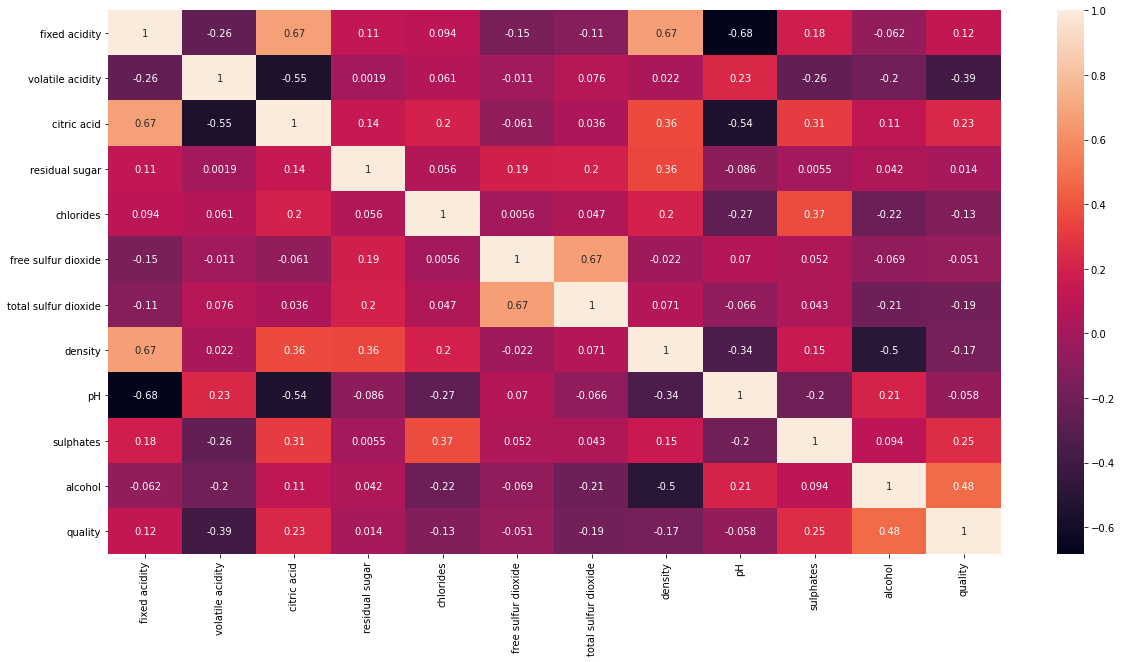

In [18]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

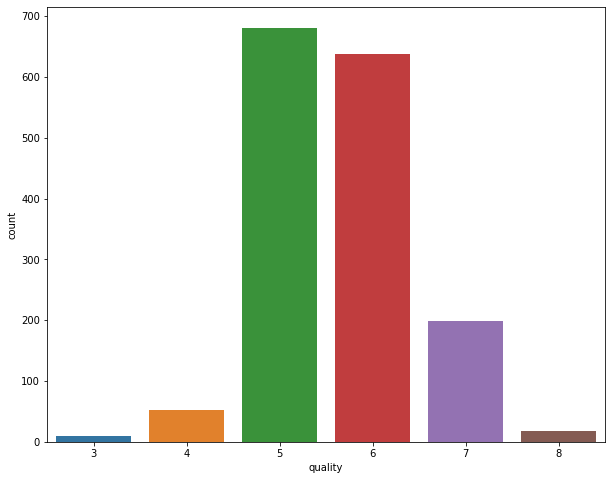

In [27]:
#Label distribution using seaborn.countplot()
plt.figure(figsize=(10, 8))
sns.countplot(x ='quality', data = df)
plt.show()

<AxesSubplot:xlabel='free sulfur dioxide'>

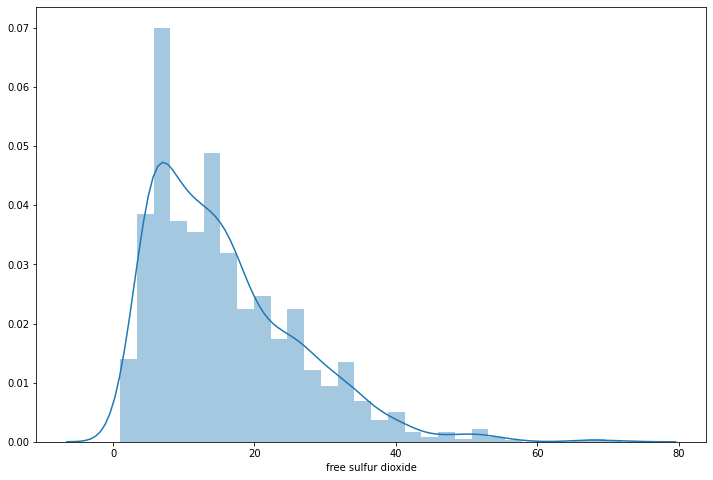

In [47]:
#EDA using distplot
plt.figure(figsize=(12, 8))
sns.distplot(df["free sulfur dioxide"])

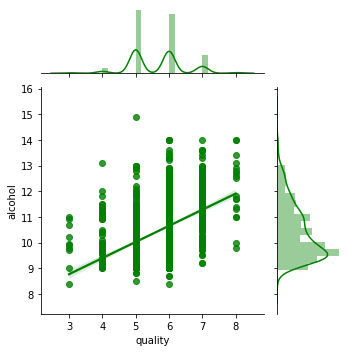

In [50]:
#EDA using Jointplot
sns.jointplot("quality", "alcohol", data=df,height=5,kind="reg",ratio=3, color="g")

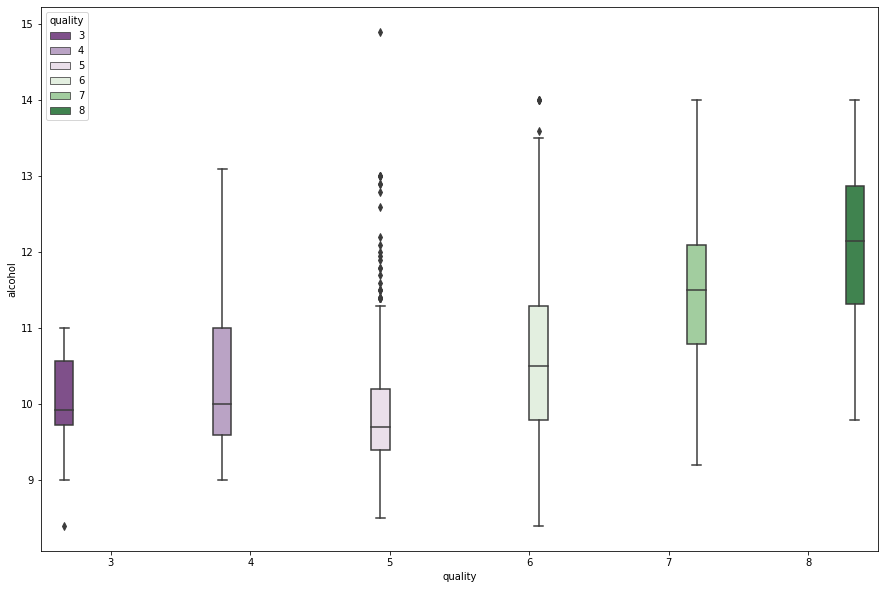

In [52]:
#EDA using Boxplot
f,ax = plt.subplots(figsize =(15,10))
sns.boxplot(x="quality" , y="alcohol", hue="quality",data=df,palette="PRGn",ax=ax)
plt.show()

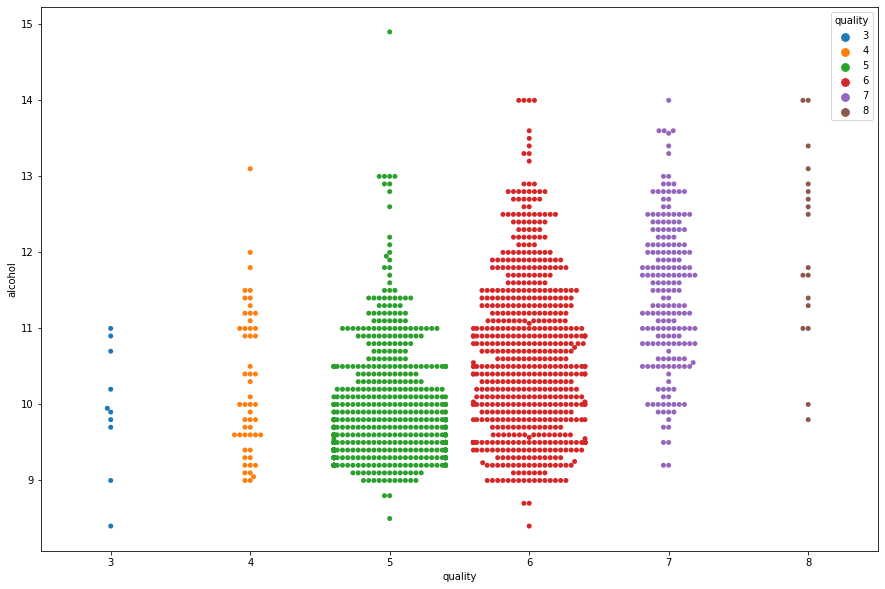

In [71]:
#EDA using Swarm Plot
f,ax = plt.subplots(figsize =(15,10))
sns.swarmplot(x="quality" , y="alcohol", hue="quality",data=df,ax=ax)
plt.show()

## Preprocessing the Data

In [72]:
#Cleaning duplicate values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [73]:
data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


There are **240 duplicates** to be removed.

In [74]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [75]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

148

In [76]:
new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1447,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1448,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1449,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [77]:
# Model building
from sklearn import preprocessing
X = data.drop(['fixed acidity'], axis = 1) # independent variable
y = data[['fixed acidity']] #dependent variable

#Scaling the data (Standardization)

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns)

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns)

X_s

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["quality"])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [79]:
data["Label"].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: Label, dtype: int64

In [80]:
categories = list(set(data.quality))
data.drop(["quality"], axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [81]:
#Locating features and label
X,y = data.iloc[:,:-1], data.iloc[:,-1]

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
...,...,...,...,...,...,...,...,...,...,...,...
801,8.6,0.550,0.09,3.30,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
61,7.7,0.690,0.49,1.80,0.115,20.0,112.0,0.99680,3.21,0.71,9.3
431,7.8,0.550,0.35,2.20,0.074,21.0,66.0,0.99740,3.25,0.56,9.2
1210,6.8,0.650,0.02,2.10,0.078,8.0,15.0,0.99498,3.35,0.62,10.4


## Machine Learning Process

In [144]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=18, random_state=0)
clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))
print("\nVariance:",(1-clf.score(X_test,y_test))-(1-clf.score(X_train,y_train)))

Accuracy of train: 0.9946380697050938
Accuracy of test: 0.61875

Bias for training: 0.00536193029490617
Bias for test: 0.38125

Variance: 0.3758880697050938


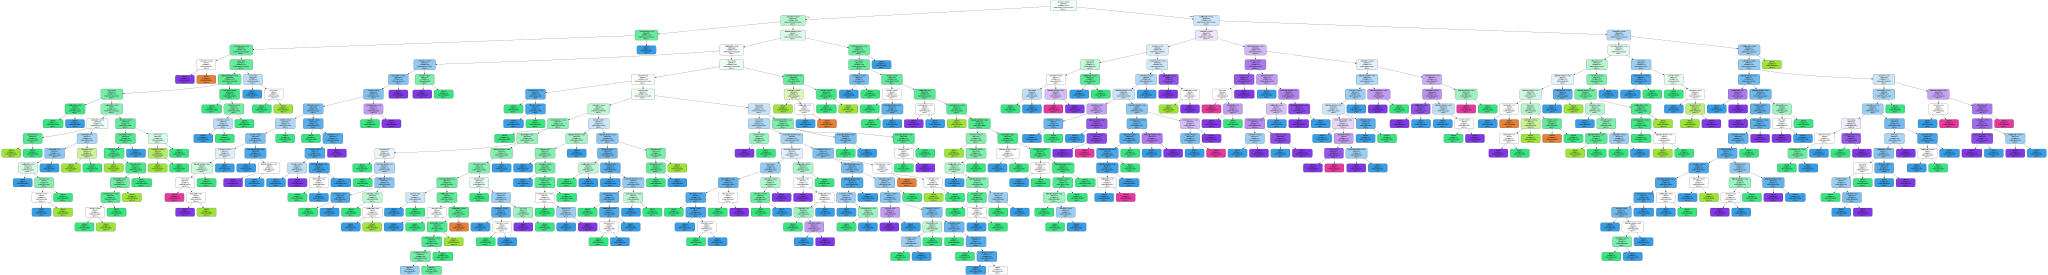

In [145]:
#Decision Tree Algorithm
dot_df = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=str(categories),
                     filled=True, rounded=True)
graph = graphviz.Source(dot_df)
graph


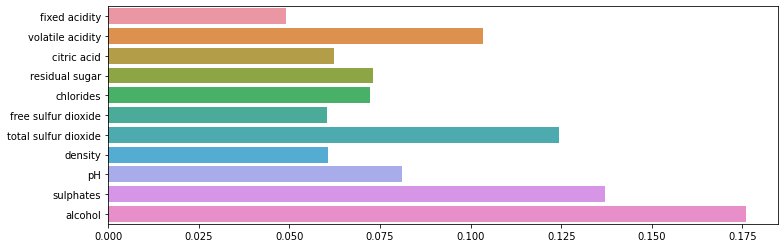

In [146]:
#Feature Importance
plt.figure(figsize=(12, 4))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [147]:
#For Classification Report Plotting
y = np.random.randint(low=0, high=10, size=100)
y_p = np.random.randint(low=0, high=10, size=100)

def plot_classification_report(y_tru, y_prd, figsize=(10, 5), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

/home/danial/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.10      0.07      0.08        15
           2       0.70      0.72      0.71       208
           3       0.66      0.60      0.63       204
           4       0.38      0.53      0.44        45
           5       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.31      0.32      0.31       480
weighted avg       0.62      0.62      0.62       480



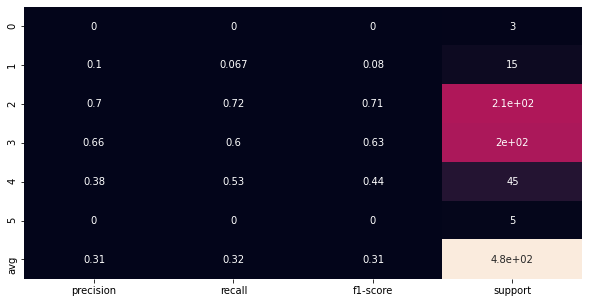

In [148]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
plot_classification_report(y_test, pred)

In [149]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.3057567963419426
Recall = 0.31986551030668675
Accuracy = 0.61875
F1 Score = 0.30988422137358307


/home/danial/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


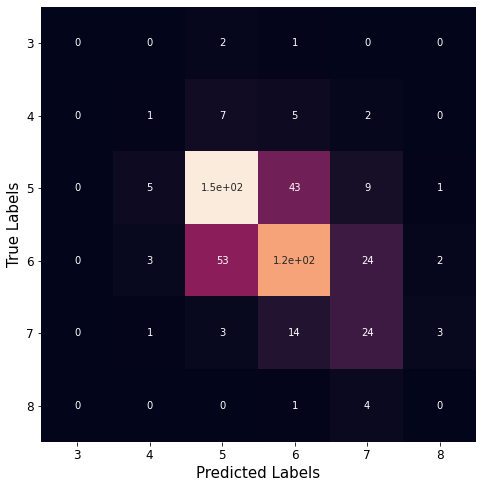

In [150]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [177]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
lr = LogisticRegression()
clf = Pipeline([('standardize', scaler),('log_reg', lr)])

clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))
#print("\nVariance:",(1-clf.score(X_test,y_test))-(1-clf.score(X_train,y_train))

Accuracy of train: 0.6005361930294906
Accuracy of test: 0.6208333333333333

Bias for training: 0.3994638069705094
Bias for test: 0.37916666666666665


/home/danial/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        15
           2       0.68      0.75      0.72       208
           3       0.60      0.61      0.61       204
           4       0.39      0.36      0.37        45
           5       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.28      0.29      0.28       480
weighted avg       0.59      0.62      0.60       480



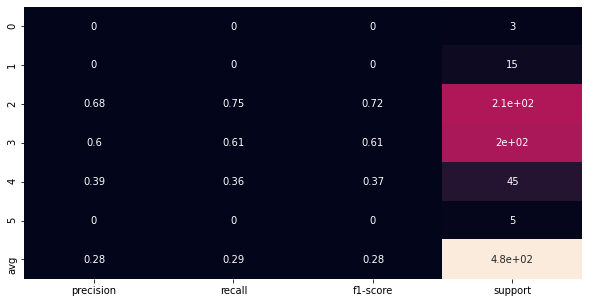

In [178]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
plot_classification_report(y_test, pred)

In [179]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.27848978708218536
Recall = 0.28718472431707726
Accuracy = 0.6208333333333333
F1 Score = 0.2823858128230134


/home/danial/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


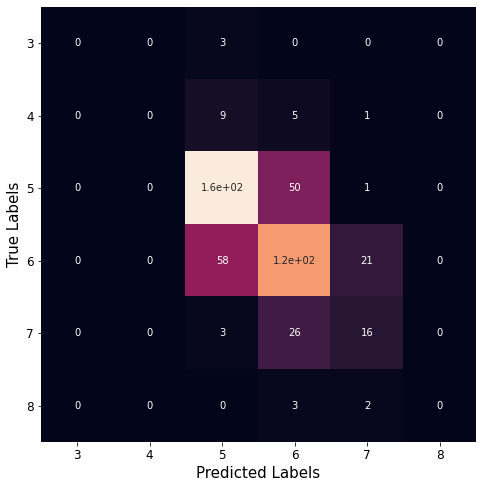

In [180]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [181]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))

Accuracy of train: 0.7453083109919572
Accuracy of test: 0.45208333333333334

Bias for training: 0.25469168900804284
Bias for test: 0.5479166666666666


              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.00      0.00      0.00        15
           2       0.53      0.59      0.56       208
           3       0.47      0.41      0.43       204
           4       0.27      0.22      0.24        45
           5       0.00      0.00      0.00         5

    accuracy                           0.45       480
   macro avg       0.24      0.26      0.24       480
weighted avg       0.45      0.45      0.45       480



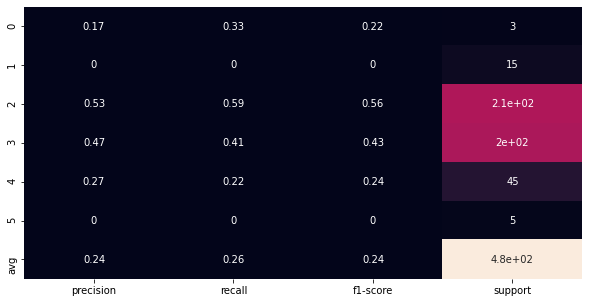

In [182]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
plot_classification_report(y_test, pred)

In [183]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.23814501623490383
Recall = 0.25896074241662476
Accuracy = 0.45208333333333334
F1 Score = 0.24287345350690878


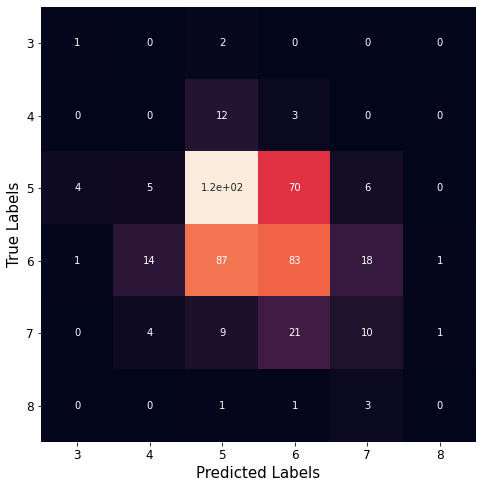

In [184]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [166]:
#XGBoost Algorithm 
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':17, 
         'eta':1, 
         'objective':'multi:softprob', 
         'eval_metric':'mlogloss',
         'num_class':6}

num_round = 6
model = xgb.train(param, dmatrix_train, num_round)

categories

[3, 4, 5, 6, 7, 8]

In [167]:
#Predictions
preds = model.predict(dmatrix_test)
preds[:10]

array([[3.99065064e-03, 6.11066679e-03, 9.36517358e-01, 4.18848172e-02,
        9.30671301e-03, 2.18979712e-03],
       [3.07635851e-02, 5.99729232e-02, 8.29544783e-01, 4.96601947e-02,
        2.04203371e-02, 9.63820238e-03],
       [3.13464348e-04, 3.79233272e-04, 5.97658975e-04, 5.42626763e-03,
        9.92699087e-01, 5.84239489e-04],
       [1.56358711e-03, 5.56387613e-03, 9.48317528e-01, 3.59315239e-02,
        6.63730921e-03, 1.98615273e-03],
       [8.34506191e-03, 3.50137567e-03, 9.14683402e-01, 6.17142990e-02,
        7.92460330e-03, 3.83129087e-03],
       [5.16808301e-04, 6.63942192e-04, 8.93878102e-01, 1.03553094e-01,
        7.31606211e-04, 6.56477700e-04],
       [4.59828600e-03, 5.79618569e-03, 8.22636664e-01, 1.54044569e-01,
        7.08332472e-03, 5.84099069e-03],
       [2.87743006e-03, 2.06715334e-03, 2.98140803e-03, 9.74963903e-01,
        1.61931105e-02, 9.16977064e-04],
       [1.29155964e-02, 8.49230587e-02, 8.75204563e-01, 1.58581864e-02,
        7.05214683e-03, 

In [168]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 4, 4, 2, 2, 3, 3, 3,
       3, 4, 2, 2, 2, 4, 2, 3, 4, 2, 3, 2, 4, 4, 2, 2, 4, 3, 2, 3, 4, 4,
       3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 2, 3, 3, 3, 2, 4,
       2, 2, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 2,
       4, 2, 2, 2, 3, 3, 4, 2, 4, 2, 2, 3, 4, 4, 4, 3, 2, 2, 2, 2, 3, 2,
       3, 2, 5, 2, 3, 3, 3, 4, 1, 3, 2, 3, 2, 2, 3, 4, 2, 2, 3, 4, 2, 2,
       3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 5, 3, 2, 2, 3, 4, 2, 3,
       3, 3, 1, 3, 3, 4, 2, 3, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3,
       2, 4, 4, 2, 2, 4, 3, 4, 3, 2, 3, 4, 2, 3, 4, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 2, 2, 2, 5, 4, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2,
       2, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 4, 3, 3, 4, 4, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 3,
       3, 1, 2, 2, 3, 4, 2, 2, 2, 3, 3, 3, 2, 3, 3, 4, 2, 3, 2, 3, 3, 2,
       2, 2, 4, 2, 2, 2, 3, 3, 2, 3, 2, 1, 2, 2, 3,

In [169]:
#RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
use_label_encoder=False #To fix an error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=2000, max_depth=17,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, eval_metric='mlogloss', seed=27)

clf = RandomizedSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("\nTuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))


Tuned: {'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1}
Mean of the cv scores is 0.630027
Train Score 1.000000
Test Score 0.643750
Seconds used for refitting the best model on the train dataset: 1.804810


/home/danial/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        15
           2       0.70      0.75      0.73       208
           3       0.67      0.60      0.63       204
           4       0.45      0.67      0.54        45
           5       0.00      0.00      0.00         5

    accuracy                           0.64       480
   macro avg       0.30      0.34      0.32       480
weighted avg       0.63      0.64      0.63       480



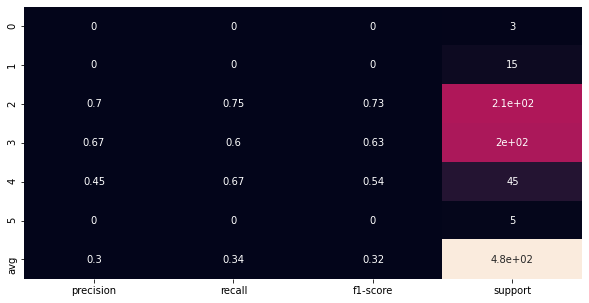

In [170]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
plot_classification_report(y_test, pred)

In [171]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.3042079992752638
Recall = 0.3365855957767722
Accuracy = 0.64375
F1 Score = 0.3165949632792561


/home/danial/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


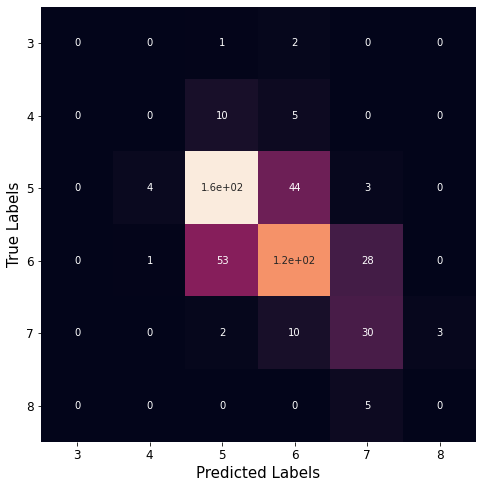

In [172]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Evaluation

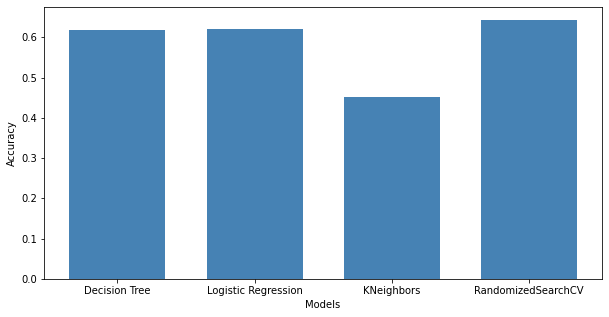

In [199]:
data = {'Decision Tree':0.618, 'Logistic Regression':0.620, 'KNeighbors':0.452,  
        'RandomizedSearchCV':0.643} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='steelblue',  
        width = 0.7) 
  
plt.xlabel("Models") 
plt.ylabel("Accuracy")  
plt.show()

1. We used 3 different Scikit learn Algorithms <b>(Decision Tree, Logistic Regression and KNeighbors)</b> in which we have seen that <b>Logistic Regression</b> gives us accuracy about <b> 62% </b> which is better than other classifers. It is both classification and regression based algorithm and it can be work for multi class classification perfectly.
2. To get the better accuracy on testset , We used <b>XGBoost</b> with <b>RandomSearchCV</b> using Hyper Parameter tunning which gives us accuracy about <b> 64% </b> . 